In [ ]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
from dwave.system.composites import TilingComposite
from dimod import SampleSet,BQM, ExactSolver

from orang import OrangSampler

import numpy as np

import tqdm


from importlib import reload

from bqmtools import graphtools

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
import sys
sys.path.append("../freezeout/")

# Where is the solution coming from?
# R.bqm?
# pickle stuff
# couple colors significance?
# 

In [ ]:
from freeze import Tiling
# package is freeze, function is tiling

In [89]:
rows = 2
cols = 3
R = Tiling(sub_m=rows, sub_n=cols)
# this is the 2 by 1 tiling 

In [90]:
_ = R.generate_ran_r_tiles()
# generating tiles?

In [91]:
sample_size=500
res = R.sample_tiling(num_reads=sample_size)
# sampling the tiles

#### Check J sign convention
#### Variable elimination order
#### check on beta_{i+1} 
Etarget = E(beta) + [dE/dbeta] dbeta

dbeta = (Etarget- E(beta))/[dE/dbeta]

dE/dbeta = specific heat/beta^2 = energy variance

In [92]:
'''
orang_sampler = OrangSampler()
# this is the simulation

learning_rate = 0.01

#for i in range(len(R.tiles)):
#    print(R.tiles[i].which_cells())

tile = R.tiles[0]
# initializing tile
qpu_energies = tile.qpu_tile_energy(res, R.tiling_composite)
# getting energy states
qpu_mean_en, qpu_std_en, qpu_stderr_en = R.compute_energy_stats(qpu_energies)
# computing stats: mean, standard deviation, and standard error
# print(f'QPU energies = {res.record.energy}')


betas = [1]
for i in tqdm.tqdm(range(sample_size)):
    new_bqm = R._update_bqm(tile.bqm, betas[-1])

    resp = orang_sampler.sample(new_bqm, num_reads=sample_size)

#     print(f'Orang energies = {resp.record.energy[:5]}')

    mean_en, var_en, stderr_en = R.compute_energy_stats(resp.record.energy)
    # calling the output by the left hand side

#     print("qpu_mean - mean = {}".format(qpu_mean_en - mean_en))

#     print(f'delta term = {(learning_rate / max(1, var_en)) * (qpu_mean_en - mean_en)}')
#    beta1 = betas[-1] - (learning_rate / max(1, var_en)) * np.sign(qpu_mean_en - mean_en)
    beta2 = betas[-1] - (learning_rate / max(1, var_en)) * (qpu_mean_en - mean_en)
    # this is 'newtons method' the optimization technique 
    # connection with quant. computer and my simulation on my computer
    

    betas.append(beta2)

'''

'\norang_sampler = OrangSampler()\n# this is the simulation\n\nlearning_rate = 0.01\n\n#for i in range(len(R.tiles)):\n#    print(R.tiles[i].which_cells())\n\ntile = R.tiles[0]\n# initializing tile\nqpu_energies = tile.qpu_tile_energy(res, R.tiling_composite)\n# getting energy states\nqpu_mean_en, qpu_std_en, qpu_stderr_en = R.compute_energy_stats(qpu_energies)\n# computing stats: mean, standard deviation, and standard error\n# print(f\'QPU energies = {res.record.energy}\')\n\n\nbetas = [1]\nfor i in tqdm.tqdm(range(sample_size)):\n    new_bqm = R._update_bqm(tile.bqm, betas[-1])\n\n    resp = orang_sampler.sample(new_bqm, num_reads=sample_size)\n\n#     print(f\'Orang energies = {resp.record.energy[:5]}\')\n\n    mean_en, var_en, stderr_en = R.compute_energy_stats(resp.record.energy)\n    # calling the output by the left hand side\n\n#     print("qpu_mean - mean = {}".format(qpu_mean_en - mean_en))\n\n#     print(f\'delta term = {(learning_rate / max(1, var_en)) * (qpu_mean_en - mean_

In [93]:
'''
# plt.plot(betas)
ax = plt.figure().gca()
ax.plot(betas)
ax.set_xlabel('iteration')
ax.set_ylabel(r'$\beta$')
ax.set_title("learning rate %0.2f, sample_size=%d"%(learning_rate, sample_size))

print()
'''

'\n# plt.plot(betas)\nax = plt.figure().gca()\nax.plot(betas)\nax.set_xlabel(\'iteration\')\nax.set_ylabel(r\'$\x08eta$\')\nax.set_title("learning rate %0.2f, sample_size=%d"%(learning_rate, sample_size))\n\nprint()\n'

In [94]:
'''
from c4_variable_elimination_order import variable_elim_order
# vv = set(variable_elim_order).intersection(R.tiling_composite.properties['qubits'])

R.estimate_ml(res, learning_rate=0.05, num_reads=10) #, elimination_order=variable_elim_order)
'''

"\nfrom c4_variable_elimination_order import variable_elim_order\n# vv = set(variable_elim_order).intersection(R.tiling_composite.properties['qubits'])\n\nR.estimate_ml(res, learning_rate=0.05, num_reads=10) #, elimination_order=variable_elim_order)\n"

In [95]:
'''
import pickle as pkl 

with open('./example_bqm_full.pkl', 'wb') as fh:
    # pickle means like'unzipping a file'
    pkl.dump(R.bqm, fh)
    # dumping R.bqm into the pickle file
    # what is the purpose of this cell?
'''

"\nimport pickle as pkl \n\nwith open('./example_bqm_full.pkl', 'wb') as fh:\n    # pickle means like'unzipping a file'\n    pkl.dump(R.bqm, fh)\n    # dumping R.bqm into the pickle file\n    # what is the purpose of this cell?\n"

/home/csel-ima2019-31/.ima-wave/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


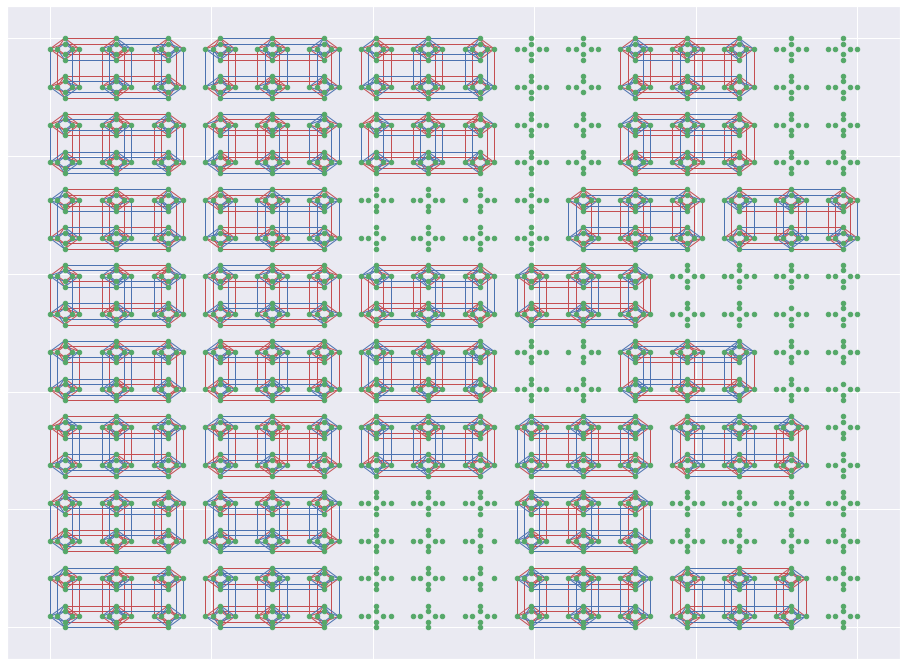

In [96]:
graphtools.draw_bqm_on_chimera(R.bqm, node_size=20)
# R.bqm is our solution
# chimera is the unit cell (there are 2 kinds..)

In [97]:
'''
ax = sns.heatmap(np.array([betas]))
plt.show()
'''

'\nax = sns.heatmap(np.array([betas]))\nplt.show()\n'

In [98]:
beta_tiles = []
#for i in range(len(R.tiles)):
for i in tqdm.tqdm(range(len(R.tiles))):
    orang_sampler = OrangSampler()
    # this is the simulation

    learning_rate = 0.01

    tile = R.tiles[i]
    # initializing tile
    qpu_energies = tile.qpu_tile_energy(res, R.tiling_composite)
    # getting energy states
    qpu_mean_en, qpu_std_en, qpu_stderr_en = R.compute_energy_stats(qpu_energies)
    # computing stats: mean, standard deviation, and standard error
    # print(f'QPU energies = {res.record.energy}')


    betas = [1]
    for i in range(sample_size):
        new_bqm = R._update_bqm(tile.bqm, betas[-1])

        resp = orang_sampler.sample(new_bqm, num_reads=sample_size)

    #     print(f'Orang energies = {resp.record.energy[:5]}')

        mean_en, var_en, stderr_en = R.compute_energy_stats(resp.record.energy)
        # calling the output by the left hand side

    #     print("qpu_mean - mean = {}".format(qpu_mean_en - mean_en))

    #     print(f'delta term = {(learning_rate / max(1, var_en)) * (qpu_mean_en - mean_en)}')
    #    beta1 = betas[-1] - (learning_rate / max(1, var_en)) * np.sign(qpu_mean_en - mean_en)
        beta2 = betas[-1] - (learning_rate / max(1, var_en)) * (qpu_mean_en - mean_en)
        # this is 'newtons method' the optimization technique 
        # connection with quant. computer and my simulation on my computer


        betas.append(beta2)
    beta_tiles.append(betas)

#Calculate average beta for each tile
average_tile_beta = []
for i in range(len(beta_tiles)):
    average = sum(beta_tiles[i])/len(beta_tiles[i])
    average_tile_beta.append(average)

#Create a phonebook between tiles and cells.
#Maybe a dictionary would work better.
cell_tile_association = []
for i in range(len(R.tiles)):
    cell_tile_association.append(R.tiles[i].which_cells())
print(len(cell_tile_association))
print(len(average_tile_beta))

print(cell_tile_association)



  3%|▎         | 1/32 [00:55<28:45, 55.67s/it]

KeyboardInterrupt: 

In [ ]:
#Use this new phonebook to assign tile average beta to the proper cell
cell_average_beta = [0]*256
#print(cell_average_beta)
for j in range(256):
    #print(cell_index)
    foundTile = False
        
    for i in range(len(cell_tile_association)):
        if j in cell_tile_association[i]:
            foundTile = True
            tile_index = i
                
    if(not foundTile):
        cell_average_beta[j] = 1.0
    else:
        cell_average_beta[j] = average_tile_beta[tile_index]
            
cell_average_beta = np.array(cell_average_beta)
cell_average_beta = np.reshape(cell_average_beta,(16,16))

ax = sns.heatmap(cell_average_beta).set_title("Average Betas for 2x3")
plt.show()
